# CNN for Cifar-10 Dataset

## Requirements

For this project we are used:
* Python 3.6
* Tensorflow 1.8.0
    * *Suite of visualization tools* Tensorboard 
* *GPUs parallel calculation manager* nVidia CUDA 9.0
* *GPU-accelerated library* nVidia cuDNN 7.1  
or 
* CPU optimized tensorflow for Intel

## Introduction

In this first notebook we are going to explain how we have set up our work.  
Essentially the process is divided into several parts:
* Set up environment with the Cifar-10 Dataset
* Define a convolutional neural network
* Define a quantization method
* Train the convolutional neural network
* Provide information about CNN's performance and accuracy

In [1]:
import numpy as np
import tensorflow as tf

C:\Users\Davide\Anaconda3\envs\tfp3.6\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Cifar-10 Dataset

Cifar-10 Dataset is taken from the official website www.cs.toronto.edu.

Dataset is stored in the data directory: cnn/data. From Cifar-10 dataset we are going to take x_train, t_train, x_test and t_test.
The training dataset set is used for training the CNN, the testing dataset is used for evaluate the performance and the accuracy of the network.

### Load data

In [2]:
from cnn.dense import dataset_preprocessing_by_keras
from cnn.utils.dataset import load_cifar10

In [3]:
x_train, t_train, x_test, t_test = load_cifar10()

In [4]:
x_train.shape, t_train.shape, x_test.shape, t_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [5]:
x_train = dataset_preprocessing_by_keras(x_train)
x_train[0, :, :, 0]

array([[-0.68747891, -0.65572952, -0.63985482, ..., -0.95734874,
        -1.00497283, -0.92559935],
       [-0.65572952, -0.63985482, -0.59223073, ..., -0.92559935,
        -1.02084753, -0.86210057],
       [-0.7192283 , -0.63985482, -0.65572952, ..., -0.68747891,
        -0.735103  , -0.70335361],
       ...,
       [-0.36998499, -0.7509777 , -1.00497283, ..., -0.25886212,
        -0.24298742, -0.14773924],
       [-0.25886212, -0.65572952, -1.19546919, ...,  0.31262694,
        -0.00486698, -0.49698256],
       [-0.27473681, -0.35411029, -1.11609571, ...,  0.75711843,
         0.64599556,  0.28087755]])

## CNN Model and Training

We will use a custom made wrapper for tensorflow NN training and use.

In [6]:
from cnn.model_class import TfClassifier

This CNN is called *dense_cnn*. Here we will explain how it is composed.

The CNN is composed by several layers. In the first part there are 2 **convolutional** layers and 2 **pooling** layers (they are alternated), then there are a *flatten* layer followed by a **relu** layer, a *dropout* layer and finally a **softmax** layer.

The network uses a stochastic gradient descent optimizer and a categorical crossentropy loss.  
To judge the performance of our model we are used a MSE metric.

In [7]:
from cnn.dense import NET_NAME, eval_fn, forward_pass, loss_fn

In [8]:
model = TfClassifier(NET_NAME, forward_pass, loss_fn, eval_fn,
                     tf.train.AdamOptimizer())

This network is trained for 50 epochs using GPU.  
GPU used: NVIDIA GeForce GTX 1050.

In [9]:
history = model.fit(
   [x_train, t_train],
   batch_size=64,
   validation_split=0.1,
   epochs=150,
   verbosity=1,
   drop_prob=0.5)

print(history)

For training: tensorboard --logdir=/tmp/log-tb/dense_cnn/training
For validation: tensorboard --logdir=/tmp/log-tb/dense_cnn/validation
{'accuracy': ((0.5924, 0.593), (0.6772, 0.6682), (0.6892, 0.6838), (0.6964, 0.6892), (0.7076, 0.6984), (0.7152, 0.7118), (0.7228, 0.7106), (0.7136, 0.7016), (0.7144, 0.71), (0.716, 0.7072), (0.7144, 0.7074), (0.7232, 0.7086), (0.7128, 0.704), (0.7248, 0.7124), (0.7144, 0.7048), (0.7136, 0.701), (0.7204, 0.7116), (0.7116, 0.7046), (0.7236, 0.7096), (0.7156, 0.706), (0.7144, 0.703), (0.7144, 0.7086), (0.7092, 0.703), (0.7108, 0.7036), (0.7004, 0.694), (0.7108, 0.704), (0.7132, 0.7028), (0.7256, 0.7116), (0.7276, 0.716), (0.7172, 0.705), (0.7264, 0.7142), (0.7116, 0.7074), (0.708, 0.7064), (0.7188, 0.7042), (0.7212, 0.7096), (0.728, 0.7152), (0.7268, 0.7134), (0.7312, 0.7152), (0.7192, 0.7108), (0.722, 0.708), (0.7212, 0.7112), (0.73, 0.7204), (0.7336, 0.7202), (0.7124, 0.7058), (0.724, 0.7118), (0.7208, 0.7128), (0.7232, 0.7064), (0.7236, 0.7076), (0.725

Then it's evaluated.

In [10]:
evals = model.evaluate([x_test, t_test])

print(evals)

INFO:tensorflow:Restoring parameters from C:/Users/Davide/Desktop/CNN/acaz/cnn/models/dense_cnn/model.ckpt
[{'logits': array([[ -1141.107  ,  -1607.554  ,  -1003.59467, ...,  -1338.3154 ,
         -1394.2513 ,   -741.91125],
       [  -873.7434 ,  -1952.3638 ,  -1537.012  , ...,   -908.1919 ,
          -297.3111 ,    201.77966],
       [ -1860.421  ,  -4300.801  ,  -2365.5981 , ...,  -1709.2993 ,
         -1130.0011 ,   -432.07578],
       ...,
       [  -204.09456,   -963.1038 ,   -720.9355 , ...,   -482.63452,
         -1389.3052 ,  -1894.2306 ],
       [ -4424.6855 ,  -9307.471  , -12308.264  , ...,  -8045.2144 ,
        -10006.3545 ,   1042.32   ],
       [ -1985.9484 ,  -2272.3928 ,  -1287.0862 , ...,  -2329.0818 ,
         -1153.807  ,    198.07487]], dtype=float32), 'classes': array([5, 9, 9, ..., 3, 9, 9], dtype=int64), 'probabilities': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0

## Tensorboard Results

Here's a function made by us that plot tags data got from the last tensorboard session.

In [11]:
import matplotlib.pyplot as plt
import glob

'''Fn that plot tags data got from the last tensorboard session
param: is the tag that the function will look for in the output file generated by tensorflow
source: there are only two options of source, training or validation'''
def plot_from_tensorfboard (param, source):
    files_in_dir = len(glob.glob("/tmp/log-tb/" + NET_NAME + "/" + source + "/*"))
    values = []
    for e in tf.train.summary_iterator(glob.glob("/tmp/log-tb/" + NET_NAME + "/" + source + "/*")[files_in_dir - 1]):
        for v in e.summary.value:
            if v.tag == param:
                values.append(v.simple_value)
    values = np.array(values)
    plt.plot(values)
    plt.show()

### Generated graphs

The graphs generated by tensorflow must be interpreted in this way:  
Axis of the ordinates: Tag (param) value;  
Axis of the abscissas:
* *Training* graphs: Training Step
* *Validation* graphs: Epoch

Here's **loss** data plot, got from Tensorboard, for *training*:

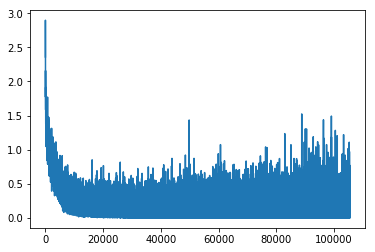

In [12]:
plot_from_tensorfboard('loss','training')

Here's **loss** data plot, got from Tensorboard, for *validation*:

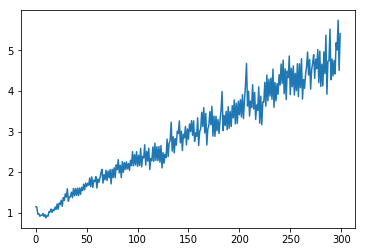

In [13]:
plot_from_tensorfboard('loss','validation')

Here's **mse** data plot, got from Tensorboard, for *training*:

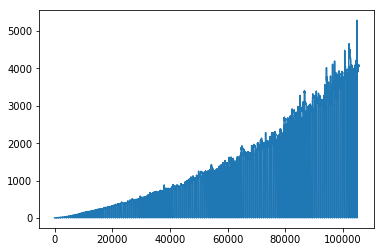

In [14]:
plot_from_tensorfboard('mse','training')

Here's **mse** data plot, got from Tensorboard, for *validation*:

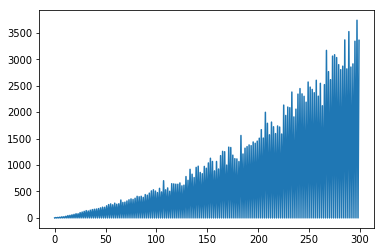

In [15]:
plot_from_tensorfboard('mse','validation')

Here's **accuracy** data plot, got from Tensorboard, for *training*:

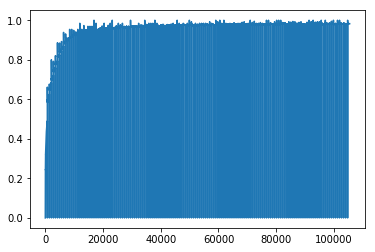

In [16]:
plot_from_tensorfboard('accuracy_1','training')

Here's **accuracy** data plot, got from Tensorboard, for *validation*:

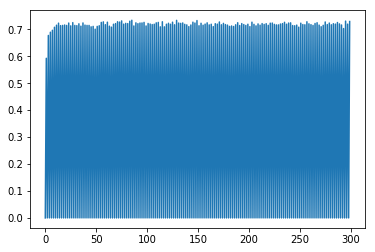

In [17]:
plot_from_tensorfboard('accuracy_1','validation')

### test

In [18]:
'''
inputs = [x_train, t_train]
input_names = ["features", "labels"]
batch_size = 64
validation_split = 0.2
MAX_BATCH_SIZE = 2000

n_samples = inputs[0].shape[0]

input_tensors = input_names
input_DL = dict(zip(input_tensors, inputs))

input_LD = _split_data_dict_in_perc(input_DL, n_samples,
                                    np.array([1 - validation_split]))

train_dict = input_LD[0]
val_dict = input_LD[1]

n_train_samples = train_dict[input_tensors[0]].shape[0]

train_LD = _batch_data_dict(train_dict, n_train_samples, batch_size)

if n_samples - n_train_samples > MAX_BATCH_SIZE:
    val_LD = _batch_data_dict(val_dict, n_samples - n_train_samples,
                              MAX_BATCH_SIZE)
else:
    val_LD = [val_dict]

train_LD = _set_train_mode_to_LD(train_LD, True)
val_LD = _set_train_mode_to_LD(val_LD, False)
'''

'\ninputs = [x_train, t_train]\ninput_names = ["features", "labels"]\nbatch_size = 64\nvalidation_split = 0.2\nMAX_BATCH_SIZE = 2000\n\nn_samples = inputs[0].shape[0]\n\ninput_tensors = input_names\ninput_DL = dict(zip(input_tensors, inputs))\n\ninput_LD = _split_data_dict_in_perc(input_DL, n_samples,\n                                    np.array([1 - validation_split]))\n\ntrain_dict = input_LD[0]\nval_dict = input_LD[1]\n\nn_train_samples = train_dict[input_tensors[0]].shape[0]\n\ntrain_LD = _batch_data_dict(train_dict, n_train_samples, batch_size)\n\nif n_samples - n_train_samples > MAX_BATCH_SIZE:\n    val_LD = _batch_data_dict(val_dict, n_samples - n_train_samples,\n                              MAX_BATCH_SIZE)\nelse:\n    val_LD = [val_dict]\n\ntrain_LD = _set_train_mode_to_LD(train_LD, True)\nval_LD = _set_train_mode_to_LD(val_LD, False)\n'